In [11]:
! pip install requests

In [12]:
! pip install pandas

In [13]:
import requests
import json
import pandas as pd
import numpy as np

## 結果データを取得する

In [10]:
def getResultData(id):
    try:
        response = requests.get(f'https://oyster-app-8jboe.ondigitalocean.app/therb/{id}')
        data = json.loads(response.text)
        
        #jsonデータをpandasのdataframeに変換する
        return data['data']
    except:
        throw('no id matches data in database')

getResultDataに渡すidはtherb-frontendのUIのここから取得できます
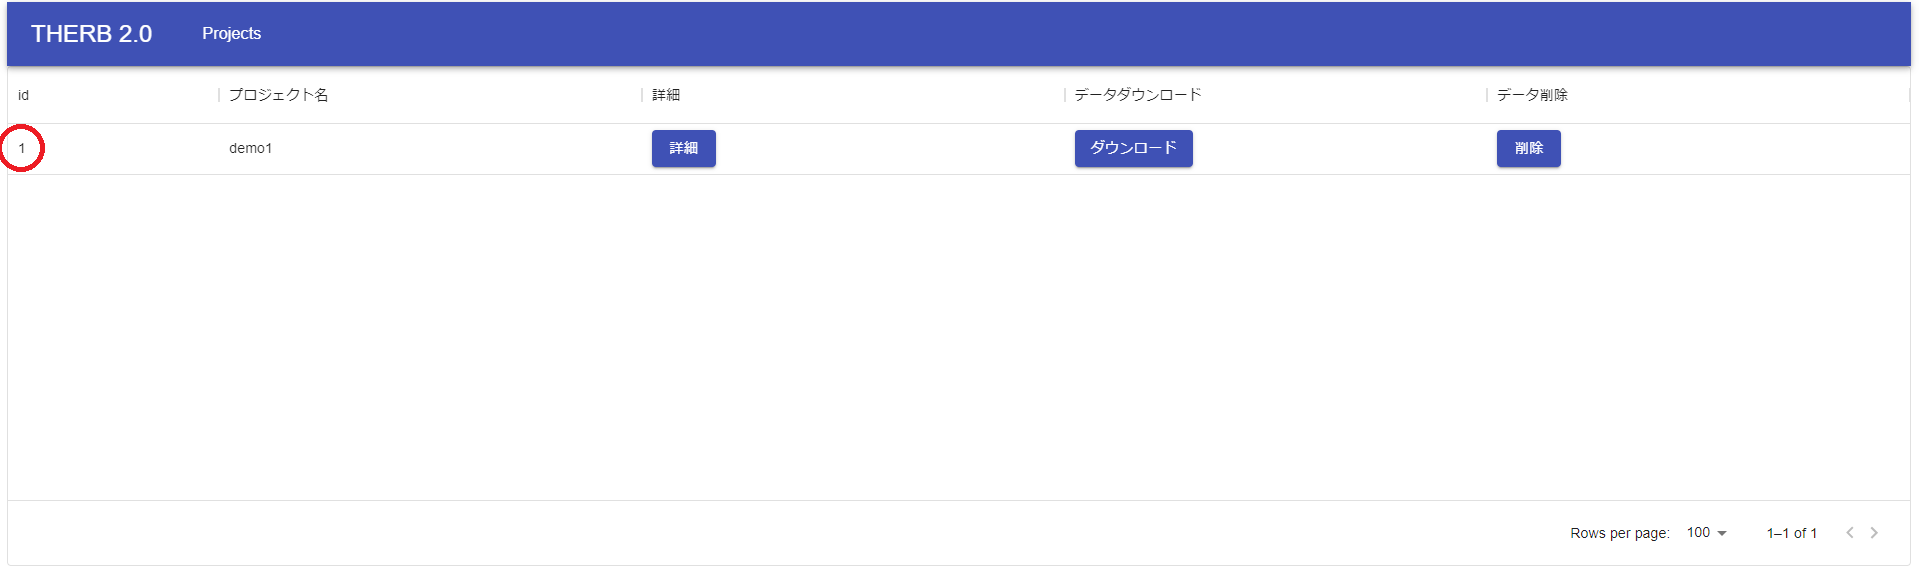

In [11]:
resultData = getResultData(1)

In [12]:
resultData

[{'roomId': 1,
  'results': {'time': ['01/05/24:00',
    '01/06/01:00',
    '01/06/02:00',
    '01/06/03:00',
    '01/06/04:00',
    '01/06/05:00',
    '01/06/06:00',
    '01/06/07:00',
    '01/06/08:00',
    '01/06/09:00',
    '01/06/10:00',
    '01/06/11:00',
    '01/06/12:00',
    '01/06/13:00',
    '01/06/14:00',
    '01/06/15:00',
    '01/06/16:00',
    '01/06/17:00',
    '01/06/18:00',
    '01/06/19:00',
    '01/06/20:00',
    '01/06/21:00',
    '01/06/22:00',
    '01/06/23:00',
    '01/06/24:00',
    '01/07/01:00',
    '01/07/02:00',
    '01/07/03:00',
    '01/07/04:00',
    '01/07/05:00',
    '01/07/06:00',
    '01/07/07:00',
    '01/07/08:00',
    '01/07/09:00',
    '01/07/10:00',
    '01/07/11:00',
    '01/07/12:00',
    '01/07/13:00',
    '01/07/14:00',
    '01/07/15:00',
    '01/07/16:00',
    '01/07/17:00',
    '01/07/18:00',
    '01/07/19:00',
    '01/07/20:00',
    '01/07/21:00',
    '01/07/22:00',
    '01/07/23:00',
    '01/07/24:00',
    '01/08/01:00',
    '01/08/02:00

部屋ごとにデータを整理できるようにする必要

In [14]:
def convertToDataframe(resultDict):
    columns = []
    rows = []
    for k,v in resultDict.items():
        columns.append(k)
        rows.append(v)
    
    #transposedRows = np.array(rows,dtype=np.float32).T
    transposedRows = np.array(rows).T
    df = pd.DataFrame(data = transposedRows, columns = columns) 
    df=df.set_index('time')
    df=df.astype('float32')
    #return transposedRows
    return df

In [15]:
df_room1 = convertToDataframe(resultData[0]['results'])
df_room2 = convertToDataframe(resultData[1]['results'])

In [17]:
df_room1

,temp,relHumidity,absHumidity
time,,,
01/05/24:00,8.4,67.559998,4.6
01/06/01:00,8.4,67.559998,4.6
01/06/02:00,8.3,68.019997,4.6
01/06/03:00,8.3,68.019997,4.6
01/06/04:00,8.2,68.489998,4.6
...,...,...,...
02/14/14:00,11.4,74.279999,6.2
02/14/15:00,12.0,71.389999,6.2
02/14/16:00,12.6,66.430000,6.0


## とりあえず折れ線グラフで可視化してみる

In [18]:
! pip install matplotlib seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### データをすぐに確認するのはpandasのほうが早い

<AxesSubplot:xlabel='time'>

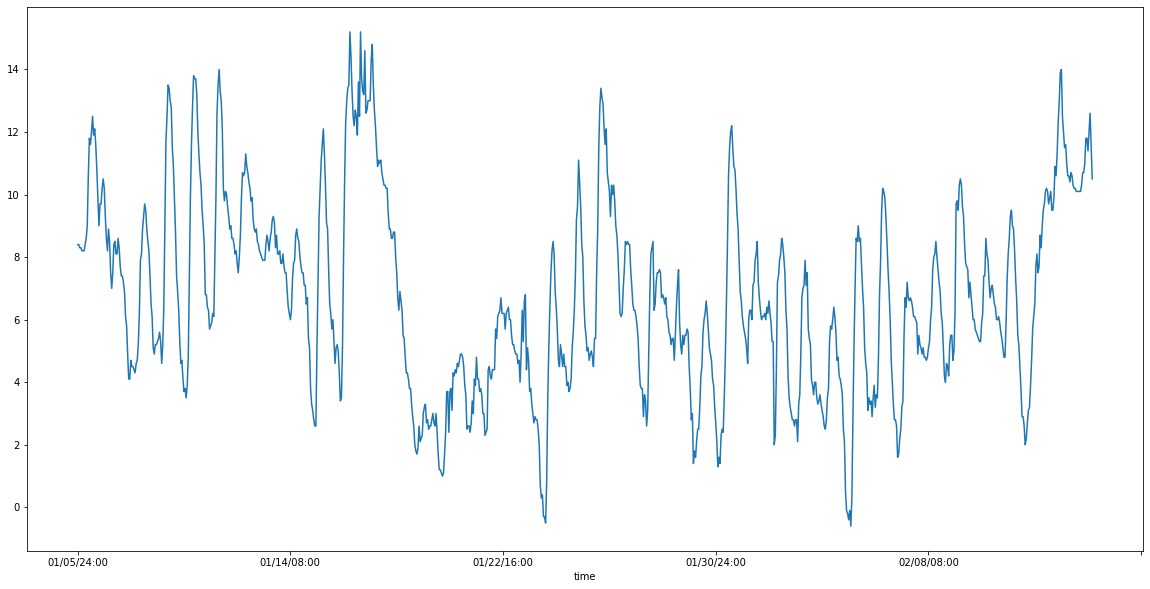

In [20]:
df_room1['temp'].plot.line(figsize=(20,10))

どの温度の時間帯が多いか？

<AxesSubplot:xlabel='time'>

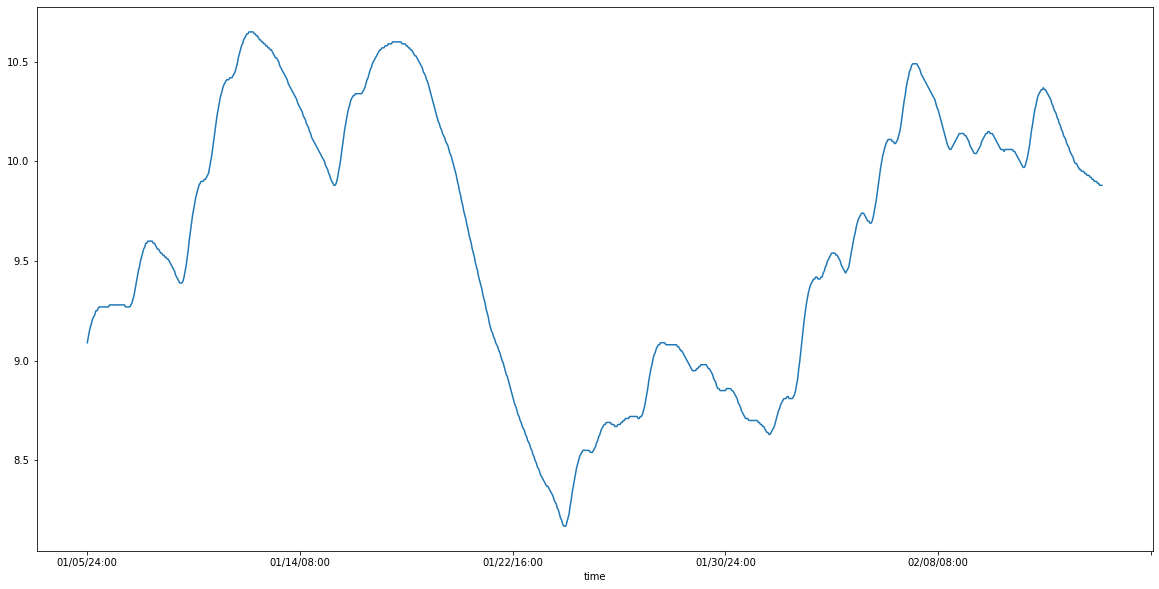

In [21]:
df_room2['temp'].plot.line(figsize=(20,10))

<AxesSubplot:>

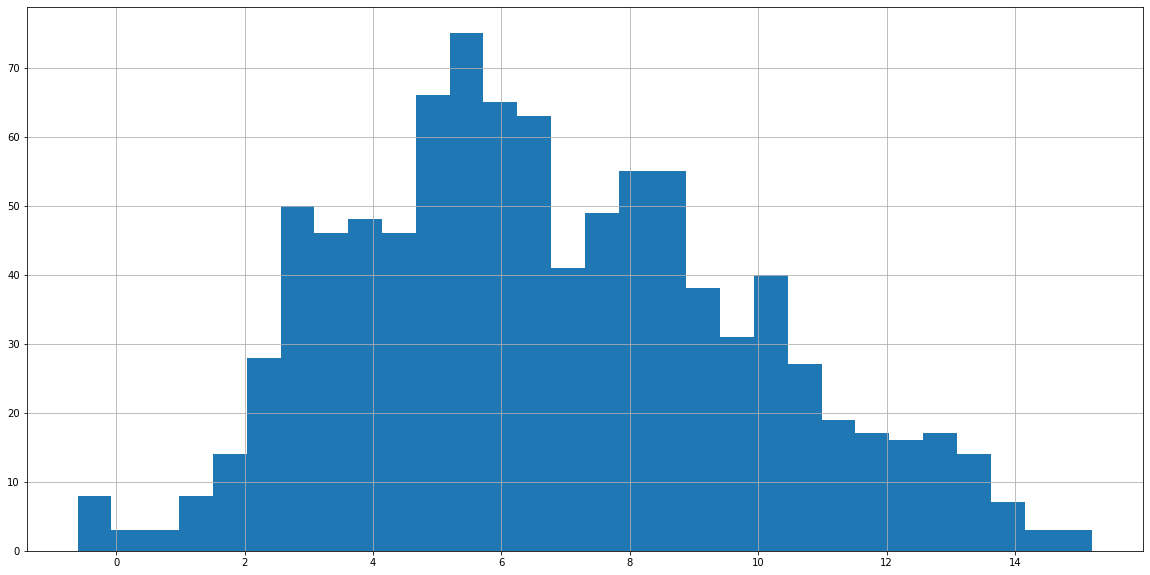

In [25]:
df_room1['temp'].hist(figsize=(20,10),bins=30)

### 快適時間帯の割合は？

In [26]:
def calcPercentage(data,min,max):
    maxSatisfied = data[lambda x: x<max]
    satisfied = maxSatisfied[lambda x: x>min]
    percentage = len(satisfied)/len(data)*100
    return round(percentage,1)

In [27]:
calcPercentage(df_room1['temp'],20,28)

0.0

In [28]:
calcPercentage(df_room2['temp'],20,28)

0.0

In [29]:
calcPercentage(df_room1['temp'],20,28)

0.0

### visualizeの見栄えをよくする

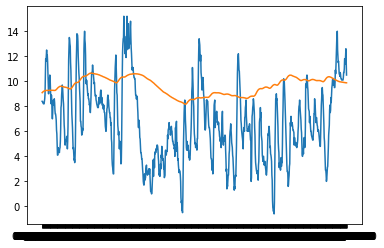

In [30]:
plt.plot(df_room1.index,df_room1['temp'],label = "temp")
plt.plot(df_room2.index,df_room2['temp'],label = "aaa")

#### Seabornは時間がかかりすぎ

<AxesSubplot:xlabel='hour', ylabel='roomT'>

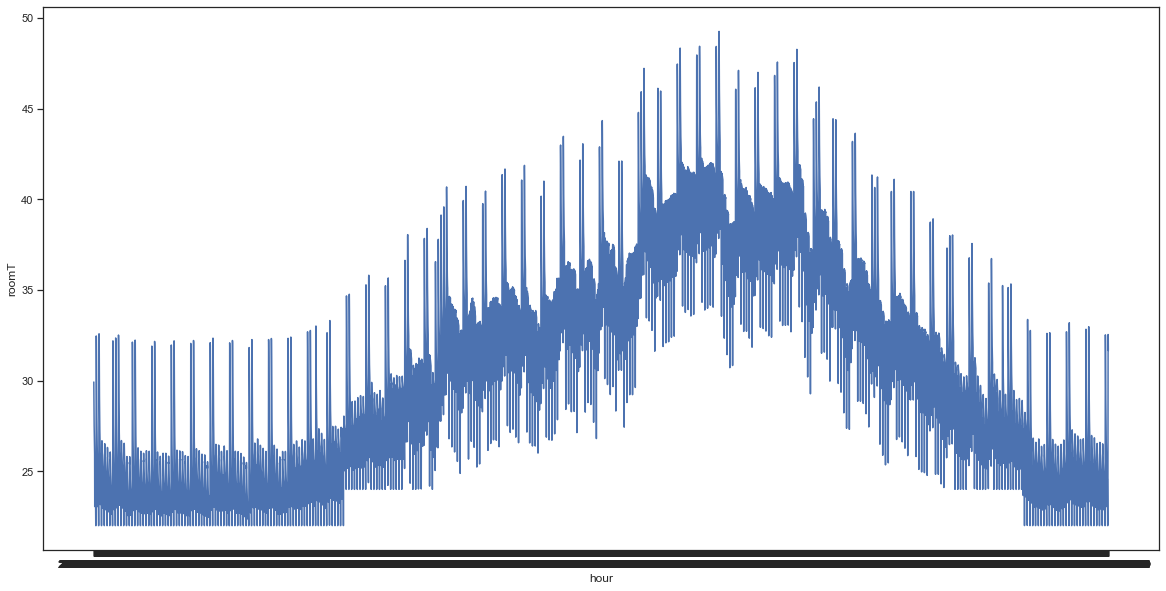

In [104]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="hour", y="roomT")

In [18]:
#psychrochartを使ってPythonで湿り空気線図を書く
#https://zenn.dev/kinonotofu/articles/210f2835d9a6e3

! pip install psychrochart

In [15]:
#とりあえずは乗ってあるものをそのままプロット
from psychrochart import PsychroChart
chart_ashrae = PsychroChart('default')
ax = chart_default.plot()
ax.get_figure()

NameError: name 'chart_default' is not defined

In [16]:
#3. ベースとなる湿り空気線図のスタイルの設定
from psychrochart import load_config
config_style = load_config('default')

#3_1 線と塗りつぶし領域の表示の有無の設定
config_style['chart_params']['with_constant_dry_temp'] = False  # 乾球温度
config_style['chart_params']['with_constant_h'] = False         # 比エンタルピー
config_style['chart_params']['with_constant_humidity'] = False  # 絶対湿度
config_style['chart_params']['with_constant_rh'] = False        # 相対湿度
config_style['chart_params']['with_constant_v'] = True          # 比容積
config_style['chart_params']['with_constant_wet_temp'] = True   # 湿球温度
config_style['chart_params']['with_zones'] = False              # 塗りつぶし領域

chart = PsychroChart(config_style)
ax = chart.plot()
ax.get_figure()

#3.2 線の色と線種と線の太さの設定
#config_styleは、#をとってもうまく起動しない。やり方の摸索が必要
#config_style['constant_dry_temp']['color'] = [0.0, 0.0, 0.0]  # 線の色
#config_style['constant_dry_temp']['linestyle'] = '-'          # 線種
#config_style['constant_dry_temp']['linewidth'] = 0.5          # 線の太さ

#3.3 描画する線と数値の間隔の設定
#Controlキー+ "/"で一気にコメントアウトが出来るよ。
# 全体
# グラフの左右の端を乾球温度の範囲で指定
# config_style['limits']['range_temp_c'] = [0, 50]            
# # グラフの上下の端を絶対湿度の範囲で指定
# config_style['limits']['range_humidity_g_kg'] = [0, 40]     

# # 乾球温度
# # 線の間隔
# config_style['chart_params']['constant_temp_step'] = 1          
# # 数値の間隔
# config_style['chart_params']['constant_temp_label_step'] = 5    

# # 比エンタルピー
# # 線の両端の値
# config_style['chart_params']['range_h'] = [5, 155]                              
# # 線の間隔
# config_style['chart_params']['constant_h_step'] = 5                             
# # 表示する数値
# config_style['chart_params']['constant_h_labels'] = [5, 25, 50, 75, 100, 125]   
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_h_labels_loc'] = 1.0                     

# # 絶対湿度
# # 線の間隔
# config_style['chart_params']['constant_humid_step'] = 1                     
# # 数値の間隔
# config_style['chart_params']['constant_humid_label_step'] = 2               
# # 上下端の数値を表示するか
# config_style['chart_params']['constant_humid_label_include_limits'] = True  

# # 相対湿度
# # 線の値
# config_style['chart_params']['constant_rh_curves'] = [10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90]   
# # 表示する数値
# config_style['chart_params']['constant_rh_labels'] = [20, 30, 40, 50, 60, 70, 80] 
# # 数値の位置（0で左寄せ、1で右寄せ）                  
# config_style['chart_params']['constant_rh_labels_loc'] = 0.85                     

# # 比容積
# # 線の両端の値
# config_style['chart_params']['range_vol_m3_kg'] = [0.78, 0.98]          
# # 線の間隔
# config_style['chart_params']['constant_v_step'] = 0.02                  
# # 表示する数値
# config_style['chart_params']['constant_v_labels'] = [0.8, 0.9, 0.96]    
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_v_labels_loc'] = 1.0             

# # 湿球温度
# # 線の両端の値
# config_style['chart_params']['range_wet_temp'] = [-10, 40]                   
# # 線の間隔
# config_style['chart_params']['constant_wet_temp_step'] = 5                         
# # 表示する数値
# config_style['chart_params']['constant_wet_temp_labels'] = [0, 5, 10, 15, 20, 25, 30, 35]   
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_wet_temp_labels_loc'] = 0.05  

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


<Figure size 2400x1350 with 1 Axes>

In [17]:
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (26, 60)}}

# 描画して設定を確認
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(point)
ax.get_figure()

NameError: name 'config_zone' is not defined